        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Spring 2022</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

You can also check the version of it using the following code.

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

Now, it's time to load the dataset

In [2]:
from tensorflow import keras
import pandas as pd
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
x_train = X_train.reshape(60000,784)
x_train.shape

(60000, 784)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

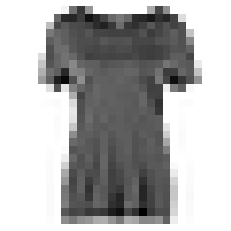

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [5]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

## Verifying the shape of train and test sets

In [7]:
print(f'\n Shape of X_train: {X_train.shape}')
print(f'\n Shape of y_train: {y_train.shape}')
print(f'\n Shape of X_test: {X_test.shape}')
print(f'\n Shape of y_test: {y_test.shape}')


 Shape of X_train: (60000, 28, 28)

 Shape of y_train: (60000,)

 Shape of X_test: (10000, 28, 28)

 Shape of y_test: (10000,)


## fitting the logistic regression model and verifying with cross-validation score with 5 fold.

# # Note:

### It is difficult to plot the scatter plot or similar EDA visualization on this MNIST data set because it does not yield the sensible correlations and there are no normal independent variables.

### Here there are just arrays depicting the pixels of image and the corresponding label.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x_train = X_train.reshape(60000,784)
x_test = X_test.reshape(10000,784)
Log_reg = LogisticRegression()
Log_reg.fit(x_train,y_train)
y_pred_log = Log_reg.predict(x_test)
y_pred_log_train = Log_reg.predict(x_train)
def classifier(img_array, Class_names):
    clas_list = []
    for i in img_array:
        clas_list.append(Class_names[i])
    Predictions = pd.DataFrame(clas_list, columns = ['Predictions'])
    return Predictions
classifier(y_pred_log,class_names)



C:\Users\Darshanik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predictions
0,Ankle boot
1,Pullover
2,Trouser
3,Trouser
4,Shirt
...,...
9995,Ankle boot
9996,Trouser
9997,Bag
9998,Trouser


In [9]:
def Metrics(y_test,y_train,pred_values_train,pred_values_test,model_name):
    print(f'\n Out-sample Accuracy of {model_name}: {accuracy_score(y_test,pred_values_test)*100}')
    print(f'\n In-sample Accuracy of {model_name}: {accuracy_score(y_train,pred_values_train)*100}')
    print(f'\n Classification Report of Out-sample {model_name}:')
    print(f'\n  {classification_report(y_test,pred_values_test)}')
    print(f'\n Confusion Matrix of Out-sample {model_name}')
    print(f'\n {confusion_matrix(y_test,pred_values_test)}')
    
Metrics(y_test,y_train,y_pred_log_train,y_pred_log, "Logistic Regression")


 Out-sample Accuracy of Logistic Regression: 84.11999999999999

 In-sample Accuracy of Logistic Regression: 86.32

 Classification Report of Out-sample Logistic Regression:

                precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


 Confusion Matrix of Out-sample Logistic Regression

 [[812   5

### If we look at Precesion and recall for "pullover" type in classification report, it has very high precesion and recall compared to other fashion clothes. 

### This ultimately resulted in high F1-score. However, the Logistic regression model accuracy is 84.12%

### But the key take away is with logistic regression model I can classify the pullover fashion type more precisely and accurately compared to other fashion mnist types and the model's overall accuracy is 84.12% which is mediocre.

### Hence there is a need for more flexible and robust model that can incorporate high precesion, high recall and high accuracy for max possible types of mnist fashion.

# NOTE: 

### when it comes to the importance of precision or recall, in our case recall is more important because I want the diverse fashion mnist types to be classified correctly(recall) rather than classifying correctly only certain mnist types(precesion)

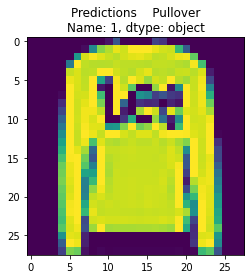

In [10]:
logistic_regression_predictions = classifier(y_pred_log,class_names)
def SeeMnist(array_name, label):
    plt.imshow(array_name.reshape(28,28))
    plt.title(f"{label}")
    plt.show()
    
SeeMnist(x_test[1], logistic_regression_predictions.iloc[1])

## Random Forrest

In [11]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=150, random_state=5)
rf_model.fit(x_train,y_train)

# let's check in-sample and out-of-sample accuracy
y_rf_pred_train  = rf_model.predict(x_train)
y_rf_pred_test  = rf_model.predict(x_test)

## Saving the state of random forrest for further use rather than running frequently

In [12]:
import pickle
import os
filename = "randomForrest.dat"
outfile = open(filename,"wb")
random_forrest = pickle.dump(rf_model,outfile)
outfile.close()
infile = open(filename,"rb")
random_forrest_model_state = pickle.load(infile)

In [13]:
random_forrest_model_state

RandomForestClassifier(n_estimators=150, random_state=5)

In [14]:
random_forrest_predictions = classifier(y_rf_pred_test,class_names)
random_forrest_predictions

,Predictions
0,Ankle boot
1,Pullover
2,Trouser
3,Trouser
4,Shirt
...,...
9995,Ankle boot
9996,Trouser
9997,Bag
9998,Trouser


In [15]:
Metrics(y_test,y_train,y_rf_pred_train,y_rf_pred_test,"Random Forrest Classifier")


 Out-sample Accuracy of Random Forrest Classifier: 87.7

 In-sample Accuracy of Random Forrest Classifier: 100.0

 Classification Report of Out-sample Random Forrest Classifier:

                precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.77      0.80      0.79      1000
           3       0.87      0.90      0.89      1000
           4       0.76      0.82      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


 Confusion Matrix of Out-sample Random Forrest Classifier


# Random Forrest model's metrics interpretation:

### If we have a look at the Classification report of Random Forrest model, the Overall Accuracy is improved to 85 ~ 88% a 3% increase from standard Logistic regression model

### Not only that even the precision and recall scores are significantly improved making our random forrest model close to predict diverse mnist types unlike logistic regression's "pullover" biasing.

### Though we are interested in recall more than precesion, this model has given satisfactory results for both recall and precesion implying the increased robustness of random forrest model.

### So for time being we can assume that ideal model to appropriately predict diverse mnist fashion types is random forrest.

# But is our Random Forrest really perfect?

### Not so perfect. Again have a look at classification metrics. For "label 6" mnist type, recall is lowest among all i.e just 59% and even precision is also lowest 76%

### So lets have a look at what that "label 6" actually meant in terms of class names and visually.

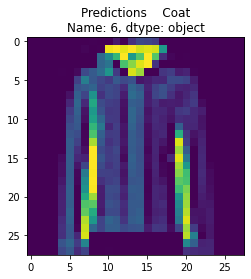

In [16]:
SeeMnist(x_test[6],random_forrest_predictions.iloc[6])

## So, random forrest is having difficulty in identifying coat but is good at identifying remaining 9 mnist types.

# Is it possible to overcome this shortcoming with neural net?

### Let us find if Neural net can overcome this minute shortcoming.

### Another reason to try neural net is the Mnist data set is kind of large with a total shape of 70000 rows and each image with 28x28 pixels i.e, (70000, 28, 28) or (70000, 784)

In [17]:
from sklearn.neural_network import MLPClassifier
Neural_net_model = MLPClassifier(solver='sgd',random_state=5, activation="logistic", early_stopping = True, validation_fraction=0.3)
Neural_net_model.fit(x_train,y_train)
y_nn_pred_train = Neural_net_model.predict(x_train)
y_nn_pred_test = Neural_net_model.predict(x_test)

In [18]:
Metrics(y_test,y_train,y_nn_pred_train,y_nn_pred_test,"Neural Network Classifier")


 Out-sample Accuracy of Neural Network Classifier: 84.52

 In-sample Accuracy of Neural Network Classifier: 86.80333333333333

 Classification Report of Out-sample Neural Network Classifier:

                precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.87      0.85      0.86      1000
           4       0.71      0.79      0.74      1000
           5       0.96      0.93      0.94      1000
           6       0.65      0.55      0.60      1000
           7       0.92      0.92      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000


 Confusion Matrix of Out-sample Neural Networ

# Not satisfactory!

### as noticed from classification report and accuracy scores of neural net is dissapointing.

### But we can check the true potential of Neural net using Grid Search Cv to get the best hyperparameters for our NN-model.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np
import warnings
warnings.filterwarnings('ignore')

param_grid = {'activation':['logistic','identity'], 'solver':['sgd'],'validation_fraction':[0.2], 'alpha': np.arange(0.0001,0.0009), 'learning_rate':['constant','invscaling']}
cv = StratifiedKFold(n_splits=5, random_state=5, shuffle=True)
grid_neural = GridSearchCV(Neural_net_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid_neural.fit(x_train, y_train)

print("Best Parameter: {}".format(grid_neural.best_params_))
print("Best Cross Vlidation Score: {}".format(grid_neural.best_score_))

Best Parameter: {'activation': 'logistic', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'sgd', 'validation_fraction': 0.2}
Best Cross Vlidation Score: 0.8471500000000001


# So, Neural network is not a good model for this data set. 

### It is evident that Grid search cv yielded in best accuracy as 84.71%. However, we got 85% out-sample accuracy without grid search.

### Not only that, Recall our point of focus is not great as that of Random Forrest classifier.

# Part-2: Importing images of various fashion brands

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


COL = ['coat.JPEG','pullover.jfif','pullover2.JPEG','Sneaker2.JPEG','Sandal.JPEG']

## Resizing and converting the images to grey_scale as our model only recognizes images in grey_scale

In [21]:
#image1 = sneaker1_image.transpose(2,0,1).reshape(3,-1)
from PIL import Image

for i in COL:
    img = Image.open(i)
    resized_img = img.resize((28, 28))
    converted_img = img.convert("L")
    converted_img.save(f"{i}")


In [22]:
test2_image = np.array(mpimg.imread("coat.JPEG"))
test3_image = np.array(mpimg.imread("pullover.jfif"))
test4_image = np.array(mpimg.imread("pullover2.JPEG"))
test5_image = np.array(mpimg.imread("Sneaker2.JPEG"))
test6_image = np.array(mpimg.imread("Sandal.JPEG"))

test2_image.shape


(28, 28)

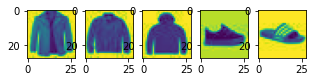

In [23]:

fig, ax = plt.subplots(1,5,figsize=(5,9))
ax[0].imshow(test2_image)
ax[1].imshow(test3_image)
ax[2].imshow(test4_image)
ax[3].imshow(test5_image)
ax[4].imshow(test6_image)
#ax.set(xticks=[], yticks=[])
plt.show()

## Testing the model to predict our own images!

In [24]:
def recognizer(image_name, model_name):
    test_pred = model_name.predict(image_name.reshape(1,784))
    prediction= classifier(test_pred, class_names)
    return prediction
recognizer(test2_image,rf_model)

,Predictions
0,Bag


## Wrong! Actual image is coat

In [25]:
recognizer(test3_image,rf_model)

,Predictions
0,Shirt


## Correct! Actual image is shirt

In [26]:
recognizer(test4_image,rf_model)

,Predictions
0,Shirt


## Correct! Actual Image is shirt/hoody

In [27]:
recognizer(test5_image,rf_model)

,Predictions
0,Bag


## Wrong! Actual image is Sneaker

In [28]:
recognizer(test6_image,rf_model)

,Predictions
0,Shirt


## Wrong! Actual image is Sandel

## Final score of model for identifying 5 images: 3 out of 5

# In a word Awful!! 

## Looks like the model is having difficulty in identifying coat(so our interpretation of random forrest unable to identify coat is correct!).

## Model is doing terribly poor in identifying Sandal and sneaker

### Let us have a look at test set sandal image!

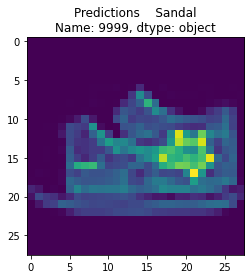

In [29]:
SeeMnist(x_test[9999],random_forrest_predictions.iloc[9999])

## So basically, the image itself is very different and very low in pixel quality. our model can identify pair of sandals. 

## But I have given it single addidas sandal

## But if we have a closer look at image it is not even a sandal, it is a pair of ankle boots misclassified as sandal.

### Anyway, if we can filter the pixel quality of training and test set may be our model can do better in identifying sandals and sneakers. 

# This can be future work!

### ----------------------------------------------Thank you---------------------------------------------------

### Name: Darshanik Mekapati
### UTA ID: 1001904282
### INSY 5378 sec - 001

#### Due Date: Apr 5 2022 at 7:00 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>